# Logistic Regression – Class Assessment

In [1]:
#important libraries 
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
import numpy as np
from sklearn.preprocessing import LabelEncoder #(specially use to for only y )
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

In [2]:
# Load libraries
from sklearn.linear_model import LogisticRegression

# Basic steps to go under the algorithm
#1)understanding the problem statement
#2) do the data minning 
#3)data preparation/ data cleaning
#4)do the sampling
#5)build the model(train the model)
#6)Test the model on the test data
#7) check the model for the business sutability


In [3]:
#read the data 
path ="C:/Users/mayur/Desktop/datascience DELL/pythonstorage/dataset_ML/LogisticRegressionusingPython/Logistic Regression using Python/xAPI-Edu-Data.csv"
data=pd.read_csv(path)

In [4]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
#data summary 
data.describe(include="all")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [6]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [7]:
nc=data.select_dtypes(exclude='object').columns.values
fc=data.select_dtypes(include='object').columns.values

In [8]:
nc

array(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion'], dtype=object)

In [9]:
fc

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [10]:
#EDA
#NULL CHECK
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [11]:
#0 check 
data[nc][data[nc]==0].count()

raisedhands           9
VisITedResources      7
AnnouncementsView    10
Discussion            0
dtype: int64

In [12]:
data.shape

(480, 17)

In [13]:
fc

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [14]:
cat=data[fc]
cat

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


# Q.1 Visualize just the categorical features individually to see 
# what options are included and how each option fares 
# when it comes to count(how many times it appears) and 
# see what can be deduce from that?


M    305
F    175
Name: gender, dtype: int64

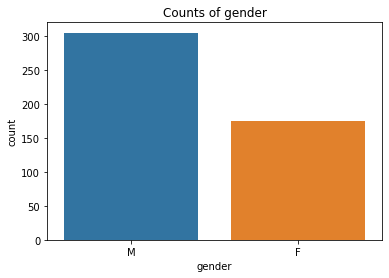

In [15]:
sns.countplot(x='gender' , data= data , order = data['gender'].value_counts().index)
plt.title('Counts of gender')
data.gender.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Lybia            6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

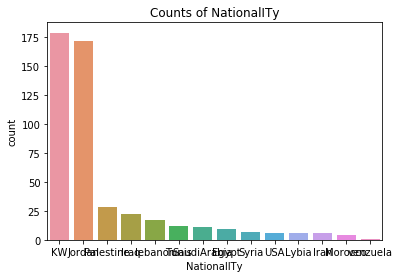

In [16]:
sns.countplot(x='NationalITy' , data= data , order = data['NationalITy'].value_counts().index)
plt.title('Counts of NationalITy')
data['NationalITy'].value_counts()

In [17]:
data.NationalITy[data.NationalITy.isin(['venzuela'])] = 'KW'

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data['NationalITy'].value_counts()

KW             180
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Lybia            6
Iran             6
Morocco          4
Name: NationalITy, dtype: int64

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Lybia            6
Iran             6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

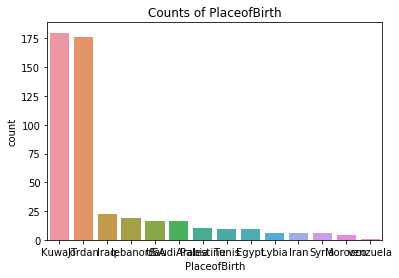

In [19]:
sns.countplot(x='PlaceofBirth' , data= data , order = data['PlaceofBirth'].value_counts().index)
plt.title('Counts of PlaceofBirth')
data.PlaceofBirth.value_counts()

In [20]:
data.PlaceofBirth[data.PlaceofBirth.isin(['venzuela'])] = 'KuwaIT'

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data.PlaceofBirth.value_counts()

KuwaIT         181
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Lybia            6
Iran             6
Syria            6
Morocco          4
Name: PlaceofBirth, dtype: int64

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

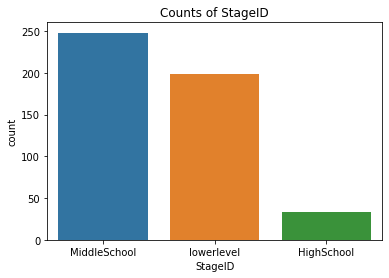

In [22]:
sns.countplot(x='StageID' , data= data , order = data['StageID'].value_counts().index)
plt.title('Counts of StageID')
data.StageID.value_counts()


G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

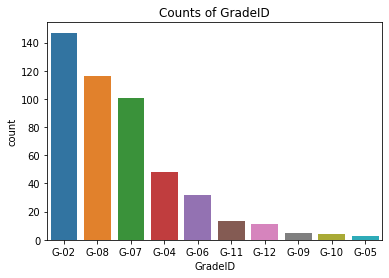

In [23]:
sns.countplot(x='GradeID' , data= data , order = data['GradeID'].value_counts().index)
plt.title('Counts of GradeID')
data.GradeID.value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

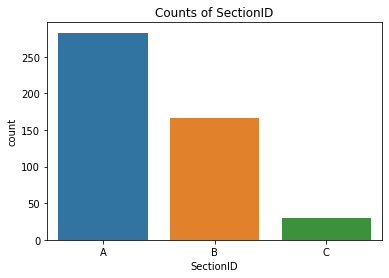

In [24]:
sns.countplot(x='SectionID' , data= data , order = data['SectionID'].value_counts().index)
plt.title('Counts of SectionID')
data.SectionID.value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Geology      24
Chemistry    24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

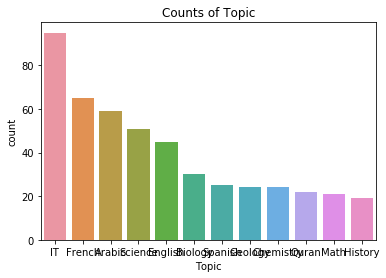

In [25]:
sns.countplot(x='Topic' , data= data , order = data['Topic'].value_counts().index)
plt.title('Counts of Topic')
data.Topic.value_counts()

F    245
S    235
Name: Semester, dtype: int64

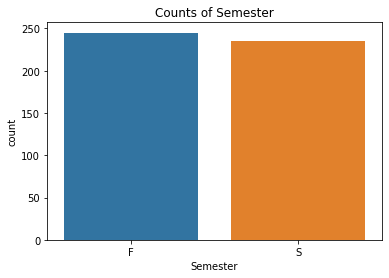

In [26]:
sns.countplot(x='Semester' , data= data , order = data['Semester'].value_counts().index)
plt.title('Counts of Semester')
data.Semester.value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

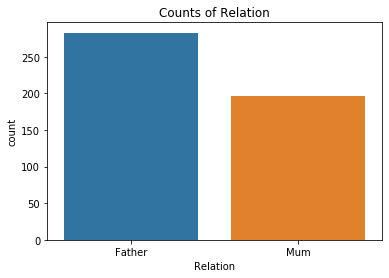

In [27]:
sns.countplot(x='Relation' , data= data , order = data['Relation'].value_counts().index)
plt.title('Counts of Relation')
data.Relation.value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

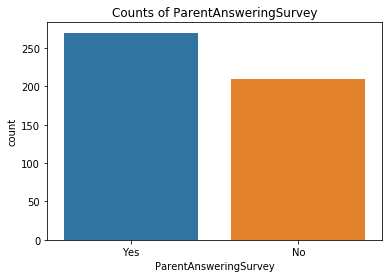

In [28]:
sns.countplot(x='ParentAnsweringSurvey' , data= data , order = data['ParentAnsweringSurvey'].value_counts().index)
plt.title('Counts of ParentAnsweringSurvey')
data.ParentAnsweringSurvey.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

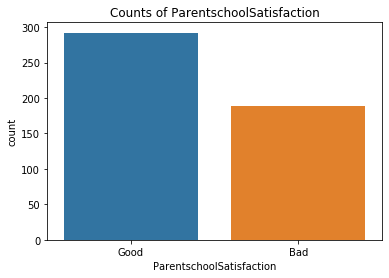

In [29]:
sns.countplot(x='ParentschoolSatisfaction' , data= data , order = data['ParentschoolSatisfaction'].value_counts().index)
plt.title('Counts of ParentschoolSatisfaction')
data.ParentschoolSatisfaction.value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

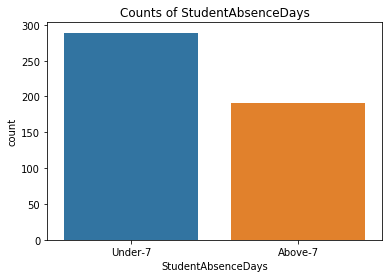

In [30]:
sns.countplot(x='StudentAbsenceDays' , data= data , order = data['StudentAbsenceDays'].value_counts().index)
plt.title('Counts of StudentAbsenceDays')
data.StudentAbsenceDays.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

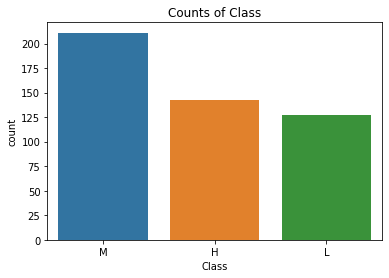

In [31]:
sns.countplot(x='Class' , data= data , order = data['Class'].value_counts().index)
plt.title('Counts of Class')
data.Class.value_counts()

# Q.3 Visualize categorical variables with numerical variables 
 # and give conclusions?


In [32]:
grade = data.GradeID
visit = data.VisITedResources
view= data.AnnouncementsView
attend = data.StudentAbsenceDays
#rhd=data.raisedhands
#dis=data.Discussion


<BarContainer object of 480 artists>

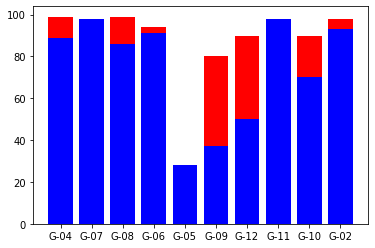

In [33]:
#Region - wise Sales and profit
plt.bar(grade,visit,label = 'VisITedResources',color = 'r')
plt.bar(grade,view,label = 'AnnouncementsView',color = 'b' )
#plt.bar(attend,rhd,label = 'raisedhands',color = 'yellow')

<BarContainer object of 480 artists>

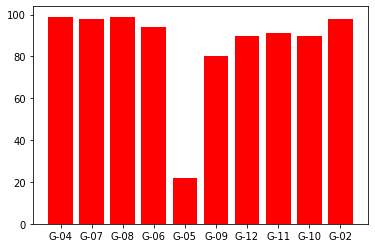

In [34]:
plt.bar(grade,visit,label = 'VisITedResources',color = 'r')

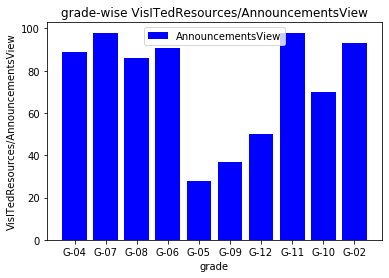

In [35]:
plt.bar(grade,view,label = 'AnnouncementsView',color = 'b' )
plt.xlabel('grade')
plt.ylabel('VisITedResources/AnnouncementsView')
plt.title('grade-wise VisITedResources/AnnouncementsView')
plt.legend()

<BarContainer object of 480 artists>

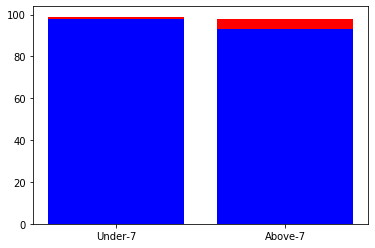

In [36]:
#Region - wise Sales and profit
plt.bar(attend,visit,label = 'VisITedResources',color = 'r')
plt.bar(attend,view,label = 'AnnouncementsView',color = 'b' )
#plt.bar(attend,rhd,label = 'raisedhands',color = 'yellow')

In [37]:
for f in fc:
    print("columns = ", f ,"\n",data[f].unique(),"\n")

columns =  gender 
 ['M' 'F'] 

columns =  NationalITy 
 ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Iran' 'Tunis'
 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia'] 

columns =  PlaceofBirth 
 ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Iran' 'Tunis'
 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia'] 

columns =  StageID 
 ['lowerlevel' 'MiddleSchool' 'HighSchool'] 

columns =  GradeID 
 ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02'] 

columns =  SectionID 
 ['A' 'B' 'C'] 

columns =  Topic 
 ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology'] 

columns =  Semester 
 ['F' 'S'] 

columns =  Relation 
 ['Father' 'Mum'] 

columns =  ParentAnsweringSurvey 
 ['Yes' 'No'] 

columns =  ParentschoolSatisfaction 
 ['Good' 'Bad'] 

columns =  StudentAbsenceDays 
 ['Under-7' 'Above-7'] 

columns =  Class 
 ['M' 'L' 'H'] 



Text(0.5, 1.0, 'Boxplot for raisedhands')

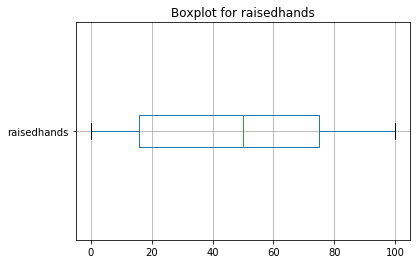

In [38]:
data.boxplot('raisedhands',vert=False)
plt.title('Boxplot for raisedhands')

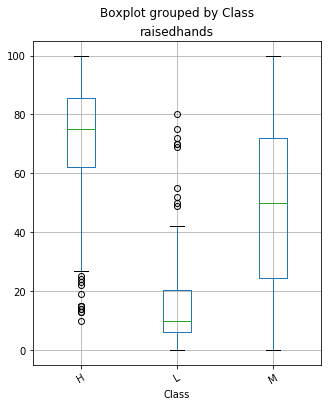

In [39]:
data.boxplot('raisedhands','Class',rot = 30,figsize=(5,6))

In [95]:
data.GradeID

0      G-04
1      G-04
2      G-04
3      G-04
4      G-04
       ... 
475    G-08
476    G-08
477    G-08
478    G-08
479    G-08
Name: GradeID, Length: 480, dtype: object

In [97]:
data.Class

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

In [40]:
nc

array(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion'], dtype=object)

In [41]:
cols = data.columns
cols

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [42]:
#remove the original factor variables
cols =list(set(cols) -set(fc))
print(cols)

['AnnouncementsView', 'VisITedResources', 'raisedhands', 'Discussion']


In [43]:
num = data[nc]
num

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


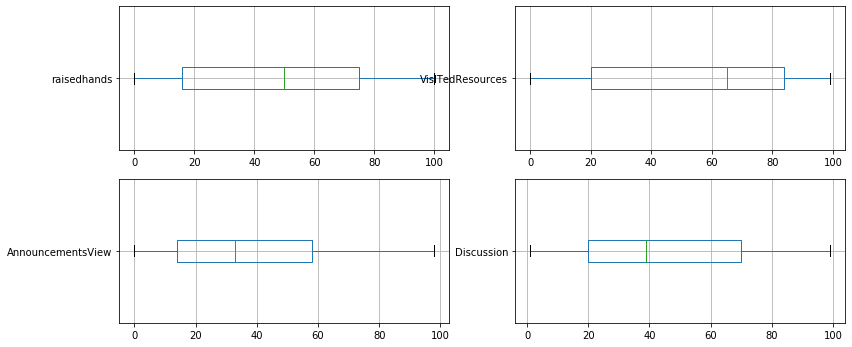

In [44]:
# Now check outlier in a loop
nrow = 3;ncol=2;npos=1
fig = plt.figure(figsize =(13,9))
for c in num:
    fig.add_subplot(nrow,ncol,npos)
    data.boxplot(c , vert=False)
    npos+=1


In [45]:
#convert factor to dummmies varraibles
new_data=data.copy()

In [46]:
num = data[nc]
num

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


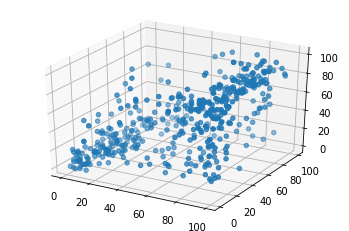

In [47]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(num['VisITedResources'], num['Discussion'], num['raisedhands'])

plt.show()

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [49]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

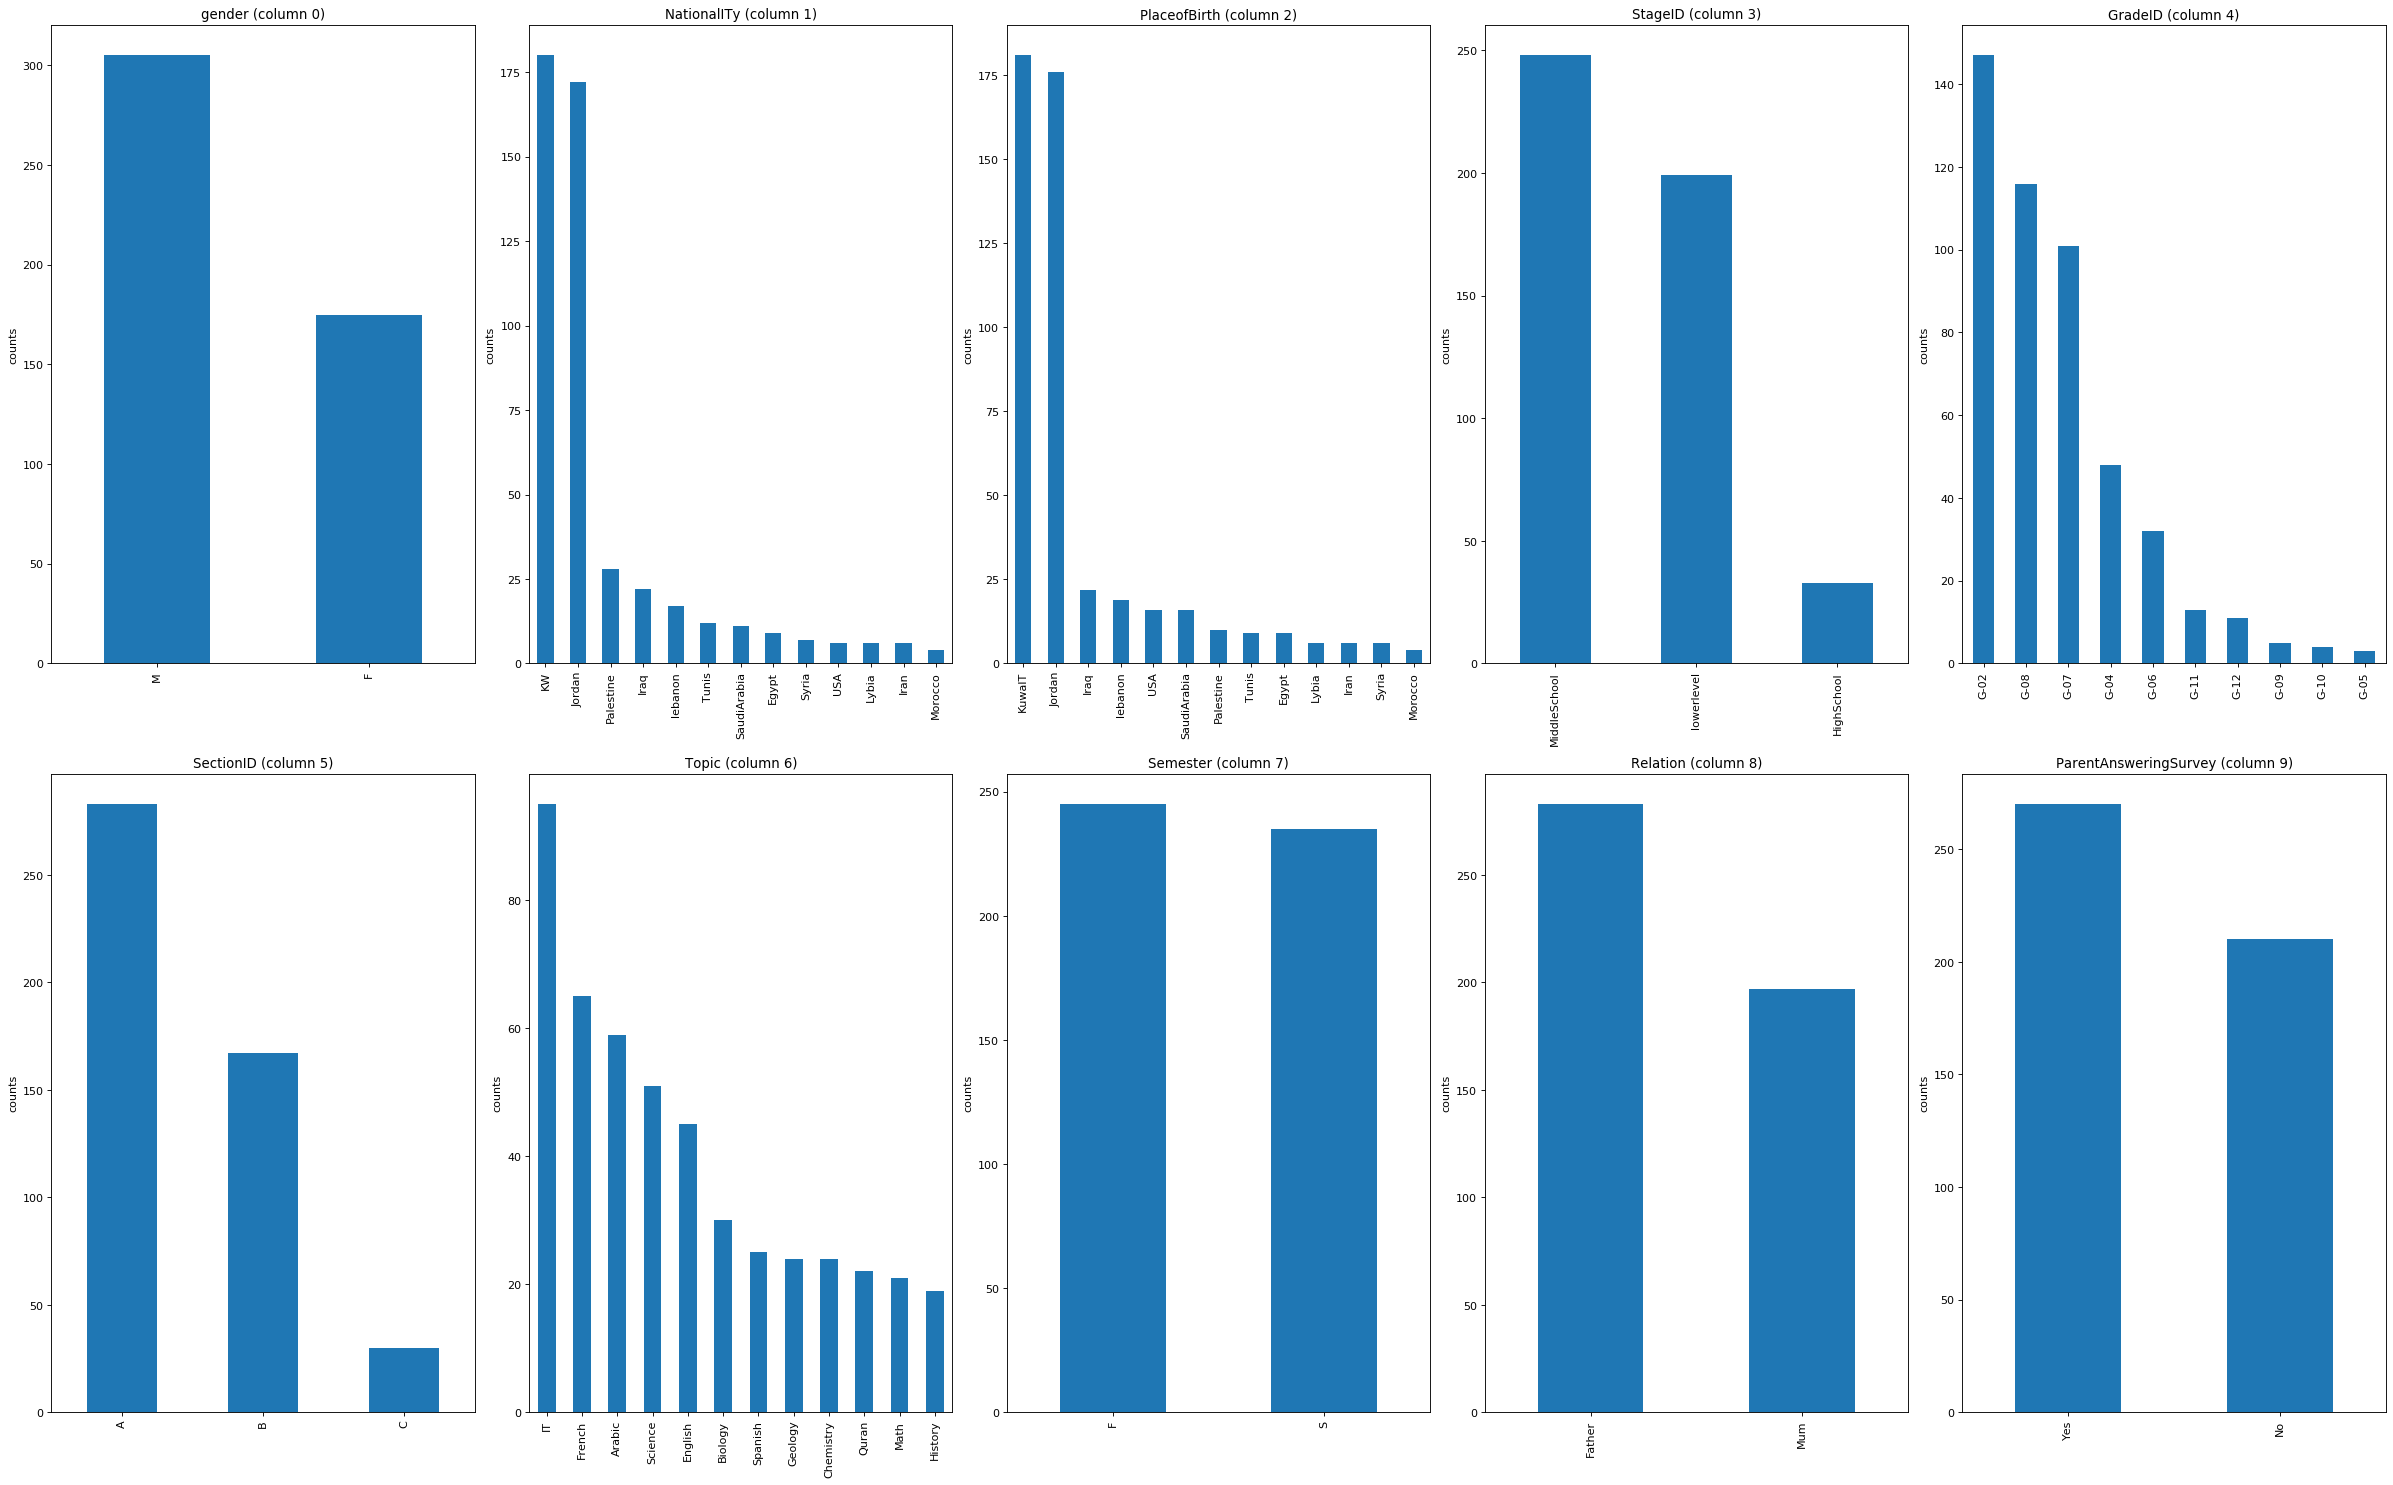

In [50]:
plotPerColumnDistribution(data, 10, 5)

In [51]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

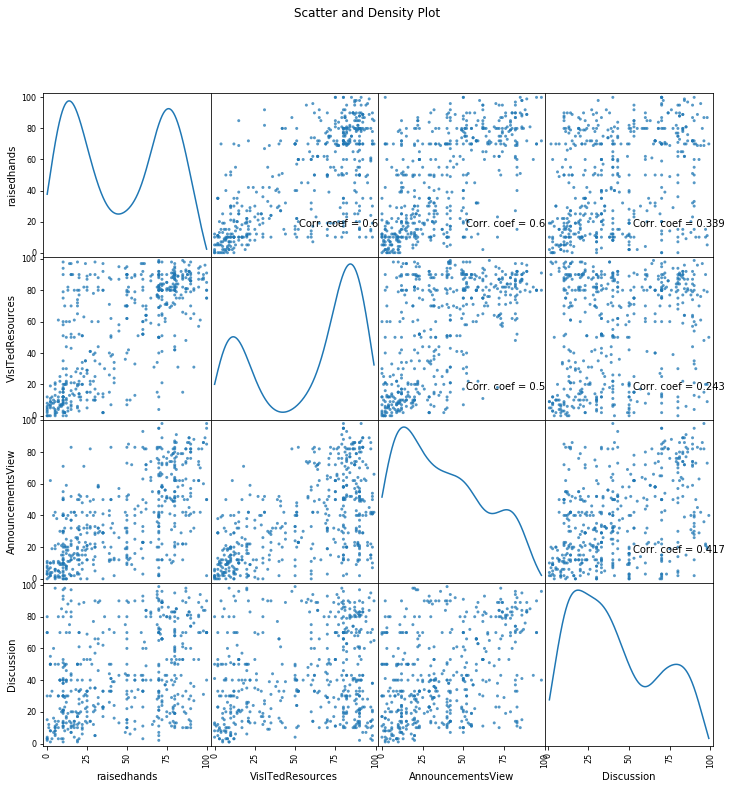

In [52]:
plotScatterMatrix(data, 12, 10)

Text(0.5, 1, 'HeatMap Correlation Matrix')

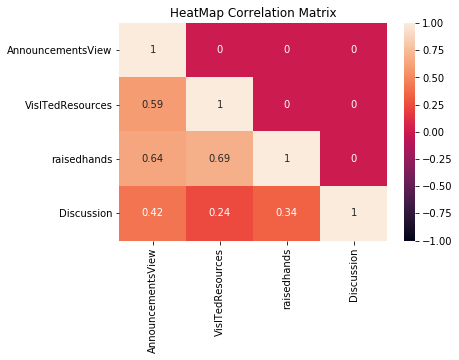

In [53]:
# we have to check the multicolinearity in data.
# Checking for Multicolinearity.
# Correlation Matrix take only the lower triangle 
cor = data[cols].corr()
cor = np.tril(cor)
sns.heatmap(cor , xticklabels = cols , yticklabels = cols ,
 vmin = -1 , vmax = 1 , annot=True , square = False)
plt.title('HeatMap Correlation Matrix') 


In [54]:
cols

['AnnouncementsView', 'VisITedResources', 'raisedhands', 'Discussion']

In [55]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [56]:
new_data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [57]:
fc

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [58]:
dfc =np.array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'Class'])
dfc

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'Class'],
      dtype='<U24')

In [59]:
for f in dfc:
    dummy=pd.get_dummies(data[f],drop_first=True,prefix=f)
    new_data= new_data.join(dummy)
    

In [60]:
new_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,Class_L,Class_M
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,0,0,0,0,0,0,1,1,0,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,...,0,0,0,0,0,0,1,1,0,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,...,0,0,0,0,0,0,0,0,1,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,...,0,0,0,0,0,0,0,0,1,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,...,0,0,0,0,0,0,0,0,0,1


In [61]:
new_data.StudentAbsenceDays

0      Under-7
1      Under-7
2      Above-7
3      Above-7
4      Above-7
        ...   
475    Above-7
476    Under-7
477    Under-7
478    Above-7
479    Above-7
Name: StudentAbsenceDays, Length: 480, dtype: object

In [62]:
new_data.StudentAbsenceDays.value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

In [63]:
new_data.StudentAbsenceDays.replace({'Under-7':0,'Above-7':1},inplace=True)

In [64]:
new_data.StudentAbsenceDays.value_counts()

0    289
1    191
Name: StudentAbsenceDays, dtype: int64

In [65]:
new_data.StudentAbsenceDays

0      0
1      0
2      1
3      1
4      1
      ..
475    1
476    0
477    0
478    1
479    1
Name: StudentAbsenceDays, Length: 480, dtype: int64

In [66]:
new_data.dtypes

gender                           object
NationalITy                      object
PlaceofBirth                     object
StageID                          object
GradeID                          object
                                  ...  
Relation_Mum                      uint8
ParentAnsweringSurvey_Yes         uint8
ParentschoolSatisfaction_Good     uint8
Class_L                           uint8
Class_M                           uint8
Length: 72, dtype: object

In [67]:
new_data = new_data.drop(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'Class'],axis=1)

In [68]:
new_data

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,Class_L,Class_M
0,15,16,2,20,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
1,20,20,3,25,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
2,10,7,0,30,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,30,25,5,35,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,40,50,12,50,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
476,50,77,14,28,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
478,30,17,14,57,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
new_data.StudentAbsenceDays.head(2)

0    0
1    0
Name: StudentAbsenceDays, dtype: int64

In [70]:
#splirt the data into train and test
trainx,testx,trainy,testy = train_test_split(new_data.drop('StudentAbsenceDays',axis=1),new_data['StudentAbsenceDays'],test_size=0.3)

In [71]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(336, 59),trainy=(336,),testx=(144, 59),testy =(144,)


In [72]:
#build the logistic regression model using Logit()
m1=sm.Logit(trainy,trainx).fit()

         Current function value: 0.296332
         Iterations: 35


C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [73]:
#summary
m1.summary()

C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\mayur\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\mayur\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\mayur\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     StudentAbsenceDays   No. Observations:                  336
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                           54
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                  0.5560
Time:                        16:38:51   Log-Likelihood:                -99.568
converged:                      False   LL-Null:                       -224.23
Covariance Type:            nonrobust   LLR p-value:                 6.993e-27
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
raisedhands                      -0.0025      0.012     -0.213      0.831      -0.026       0.021
VisITedResources                 -0.0087      0.010     -0.863      0.388      -0.028       0.011
AnnouncementsView                 0.0257      0.013      2.007      0.045       0.001       0.051
Discussion                       -0.0210      0.009     -2.389      0.017      -0.038      -0.004
gender_M                         -0.2289      0.494     -0.463      0.643      -1.197       0.739
NationalITy_Iran                 11.9065        nan        nan        nan         nan         nan
NationalITy_Iraq                  0.4389    5.9e+07   7.44e-09      1.000   -1.16e+08    1.16e+08
NationalITy_Jordan               -9.4522    274.869     -0.034      0.973    -548.186     529.282
NationalITy_KW                  -30.4254   3.96e+04     -0.001      0.999   -7.76e+04    7.76e+04
NationalITy_Lybia                 7.8452    1.5e+19   5.23e-19      1.000   -2.94e+19    2.94e+19
NationalITy_Morocco             -23.8239   4.36e+28  -5.47e-28      1.000   -8.54e+28    8.54e+28
NationalITy_Palestine           -10.4269    553.664     -0.019      0.985   -1095.588    1074.734
NationalITy_SaudiArabia          -8.5578    336.660     -0.025      0.980    -668.399     651.283
NationalITy_Syria                 9.0659   3.24e+04      0.000      1.000   -6.34e+04    6.34e+04
NationalITy_Tunis               -29.3561    6.1e+04     -0.000      1.000    -1.2e+05     1.2e+05
NationalITy_USA                 -31.3694   8.82e+04     -0.000      1.000   -1.73e+05    1.73e+05
NationalITy_lebanon              -9.4791    379.018     -0.025      0.980    -752.340     733.382
PlaceofBirth_Iran                11.9065        nan        nan        nan         nan         nan
PlaceofBirth_Iraq                 0.4389   5.91e+07   7.43e-09      1.000   -1.16e+08    1.16e+08
PlaceofBirth_Jordan               9.0460    426.172      0.021      0.983    -826.236     844.328
PlaceofBirth_KuwaIT              28.6481   2.66e+04      0.001      0.999   -5.22e+04    5.22e+04
PlaceofBirth_Lybia                7.8460    1.5e+19   5.23e-19      1.000   -2.94e+19    2.94e+19
PlaceofBirth_Morocco            -23.8239   4.36e+28  -5.47e-28      1.000   -8.54e+28    8.54e+28
PlaceofBirth_Palestine           -8.3170   6756.830     -0.001      0.999   -1.33e+04    1.32e+04
PlaceofBirth_SaudiArabia          9.8122    602.189      0.016      0.987   -1170.457    1190.082
PlaceofBirth_Syria              -10.3794   3.23e+04     -0.000      1.000   -6.32e+04    6.32e+04
PlaceofBirth_Tunis               26.4325   6.09e+04      0.000      1.000   -1.19e+05    1.19e+05
PlaceofBirth_USA                  9.1880    196.644      0.047      0.963    -376.227     394.603
PlaceofBirth_lebanon              7.9211    362.031      0.022      0.983    -701.646     717.489
StageID_MiddleSchool            -21.4153        nan        nan        nan         nan         nan
StageID

In [74]:
p1 = m1.predict(testx)
p1

471    4.263195e-01
62     1.523707e-03
398    1.427776e-10
52     2.476077e-01
37     6.284676e-01
           ...     
111    5.752209e-02
262    7.599474e-01
331    9.119225e-01
394    3.742457e-10
454    4.364378e-01
Length: 144, dtype: float64

In [75]:
#converting probabilities into classes 
p1_Y = p1.copy()
p1_Y[p1_Y < 0.5] = 0
p1_Y[p1_Y > 0.5] = 1

In [76]:
#confusion matrix
confusion_matrix(testy,p1_Y)

array([[74,  9],
       [18, 43]], dtype=int64)

In [77]:
df=pd.DataFrame({'actual':testy,'predicted':p1_Y})
df

,actual,predicted
471,0,0.0
62,0,0.0
398,0,0.0
52,0,0.0
37,0,1.0
...,...,...
111,0,0.0
262,1,1.0
331,1,1.0
394,0,0.0


In [78]:
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0,74,9,83
1,18,43,61
All,92,52,144


In [79]:
#classification_report
print(classification_report(testy,p1_Y))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85        83
           1       0.83      0.70      0.76        61

    accuracy                           0.81       144
   macro avg       0.82      0.80      0.80       144
weighted avg       0.81      0.81      0.81       144



In [80]:
##accuracy score
print(accuracy_score(testy,p1_Y))

0.8125


In [81]:
#AUC/ROC
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(testy,p1_Y)

In [82]:
#auc score
auc_score = metrics.auc(fpr,tpr)
print("AUC for model =",auc_score)

AUC for model = 0.7982421489235632


Text(0, 0.5, 'TPR')

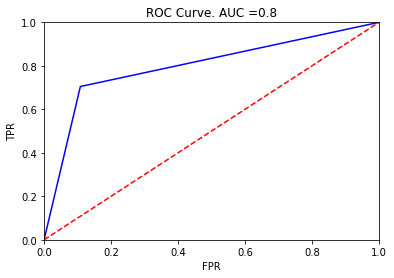

In [83]:
#plot for ROC 
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve. AUC ='+str(round(auc_score,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')

In [84]:
#feature selection
features = trainx.columns
score,pval = f_classif(trainx,trainy)

In [85]:
df_scores = pd.DataFrame({'feature':features,'score':score,'pvalue':pval})

In [86]:
#sort the dataset in the descending order of scores
df_scores.sort_values('score',ascending=False,inplace=True)
print(df_scores)

                          feature       score        pvalue
57                        Class_L  213.843086  8.955777e-38
1                VisITedResources  102.969595  2.882854e-21
0                     raisedhands   82.655938  8.886337e-18
2               AnnouncementsView   37.265789  2.859587e-09
56  ParentschoolSatisfaction_Good   24.164663  1.389017e-06
54                   Relation_Mum   19.087317  1.668821e-05
4                        gender_M   17.817691  3.137190e-05
55      ParentAnsweringSurvey_Yes   15.218509  1.158046e-04
3                      Discussion   14.638894  1.553845e-04
11          NationalITy_Palestine    6.174237  1.345161e-02
48                       Topic_IT    5.406516  2.066042e-02
9               NationalITy_Lybia    4.837177  2.853735e-02
21             PlaceofBirth_Lybia    4.837177  2.853735e-02
5                NationalITy_Iran    4.837177  2.853735e-02
32                   GradeID_G-05    4.837177  2.853735e-02
17              PlaceofBirth_Iran    4.8

In [87]:
#1)understanding the problem statement
#2) do the data minning 
#3)data preparation/ data cleaning
#4)do the sampling
#5)build the model(train the model)
#6)Test the model on the test data
#7) check the model for the business sutability


In [88]:
new_data

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,Class_L,Class_M
0,15,16,2,20,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
1,20,20,3,25,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
2,10,7,0,30,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,30,25,5,35,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,40,50,12,50,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
476,50,77,14,28,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
478,30,17,14,57,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
new_data.dtypes

raisedhands                      int64
VisITedResources                 int64
AnnouncementsView                int64
Discussion                       int64
StudentAbsenceDays               int64
gender_M                         uint8
NationalITy_Iran                 uint8
NationalITy_Iraq                 uint8
NationalITy_Jordan               uint8
NationalITy_KW                   uint8
NationalITy_Lybia                uint8
NationalITy_Morocco              uint8
NationalITy_Palestine            uint8
NationalITy_SaudiArabia          uint8
NationalITy_Syria                uint8
NationalITy_Tunis                uint8
NationalITy_USA                  uint8
NationalITy_lebanon              uint8
PlaceofBirth_Iran                uint8
PlaceofBirth_Iraq                uint8
PlaceofBirth_Jordan              uint8
PlaceofBirth_KuwaIT              uint8
PlaceofBirth_Lybia               uint8
PlaceofBirth_Morocco             uint8
PlaceofBirth_Palestine           uint8
PlaceofBirth_SaudiArabia 

Text(0.5, 1, 'HeatMap Correlation Matrix')

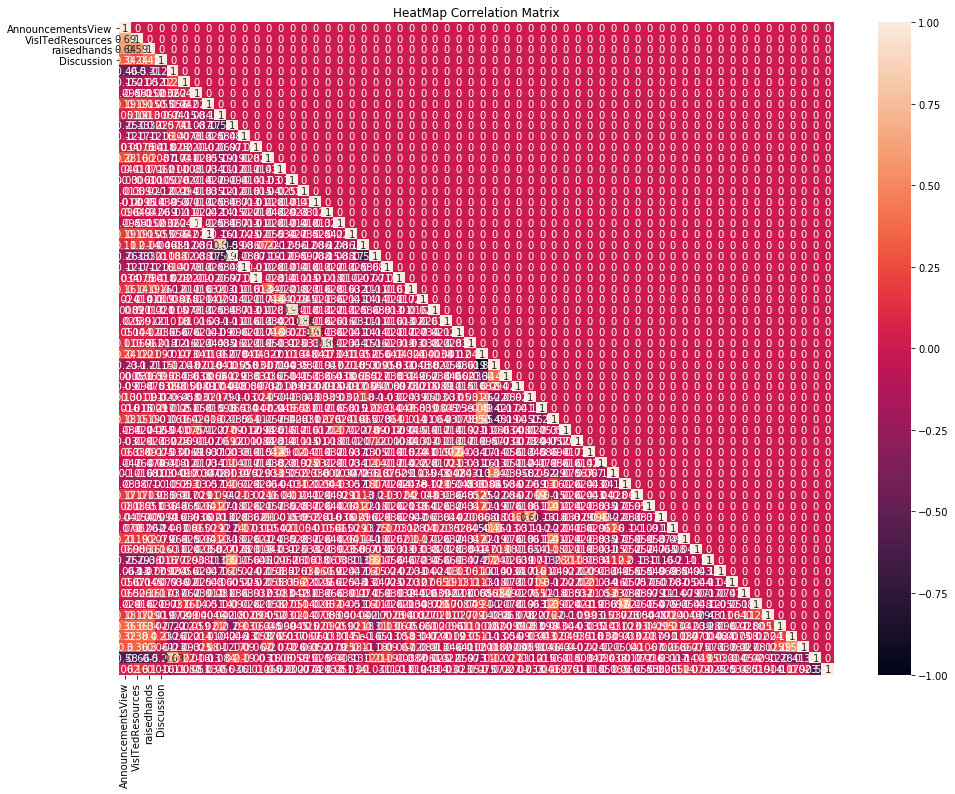

In [110]:
# we have to check the multicolinearity in data.
# Checking for Multicolinearity.
# Correlation Matrix take only the lower triangle 
cor = new_data.corr()
cor = np.tril(cor)
plt. figure (figsize =(16, 12))
sns.heatmap(cor , xticklabels = cols , yticklabels = cols ,
 vmin = -1 , vmax = 1 , annot=True , square = False)
plt.title('HeatMap Correlation Matrix') 


In [91]:
cor

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69157171,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64391777,  0.59450003,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.29701457,  0.36383549,  0.29874423, ...,  1.        ,
         0.        ,  0.        ],
       [-0.58299713, -0.66206108, -0.50415268, ..., -0.33147281,
         1.        ,  0.        ],
       [ 0.06231532,  0.15644207,  0.10139174, ...,  0.02271598,
        -0.53122633,  1.        ]])

In [101]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [102]:
new_data1 =data.copy()

In [103]:
nc1=new_data1.select_dtypes(exclude='object').columns.values
fc1=new_data1.select_dtypes(include='object').columns.values

In [104]:
fc1

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [105]:
for f in fc:
    print("columns = ", f ,"\n",data[f].unique(),"\n")

columns =  gender 
 ['M' 'F'] 

columns =  NationalITy 
 ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Iran' 'Tunis'
 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia'] 

columns =  PlaceofBirth 
 ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Iran' 'Tunis'
 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia'] 

columns =  StageID 
 ['lowerlevel' 'MiddleSchool' 'HighSchool'] 

columns =  GradeID 
 ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02'] 

columns =  SectionID 
 ['A' 'B' 'C'] 

columns =  Topic 
 ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology'] 

columns =  Semester 
 ['F' 'S'] 

columns =  Relation 
 ['Father' 'Mum'] 

columns =  ParentAnsweringSurvey 
 ['Yes' 'No'] 

columns =  ParentschoolSatisfaction 
 ['Good' 'Bad'] 

columns =  StudentAbsenceDays 
 ['Under-7' 'Above-7'] 

columns =  Class 
 ['M' 'L' 'H'] 



In [114]:
new_data1.gender.replace({'M':0,'F':1},inplace=True)
new_data1.NationalITy.replace({'KW':0,'lebanon':1,'Egypt':2,'SaudiArabia':3,'USA':4,'Jordan':5,'Iran':6,'Tunis':7,'Morocco':8,'Syria':9,'Palestine':10,'Iraq':11,'Lybia':12}inplace=True)
new_data1

SyntaxError: invalid syntax (<ipython-input-114-d17375768dbc>, line 2)

In [ ]:
new_data1.NationalITy.replace({'KW':0,'lebanon':1,'Egypt':2,'SaudiArabia':3,'USA':4,'Jordan':5,'Iran':6,'Tunis':7,'Morocco':8,'Syria':9,'Palestine':10,'Iraq':11,'Lybia':12}inplace=True)
new_data1.PlaceofBirth.replace({'KuwaIT':0,'lebanon':1,'Egypt':2,'SaudiArabia':3,'USA':4,'Jordan':5,'Iran':6,'Tunis':7,'Morocco':8,'Syria':9,'Iraq':10,'Palestine':11,'Lybia':12}inplace=True)
new_data1.StageID.replace({'lowerlevel':0,'MiddleSchool':1,'HighSchool':2},inplace=True)
new_data1.GradeID.replace({'G-04':0,'G-07':1,'G-08':2,'G-06':3,'G-05':4,'G-09':5,'G-12':6,'G-11':7,:'G-10':8,'G-02':9},inplace=True)
new_data1.SectionID.replace({'A':0,'B':1,'C':2})
new_data1.Topic.replace({'IT':0,'Math':1,'Arabic':2,'Science':3,'English':4,'Quran':5,'Spanish':6,'French':7,'History':8,'Biology':9,'Chemistry':10,'Geology':11},implace=True)
new_data1.Semester.replace({'F':0,'S':1}inplace=True)
new_data1.Relation.replace({'Father':0'Mum':1},inplace=True)
new_data1.ParentAnsweringSurvey.replace({'Yes':0'No':1},inplace=True)
new_data1.ParentschoolSatisfaction.replace({'Good':0,'Bad':1},inplace=True)
new_data1.StudentAbsenceDays.replace({'Under-7':0,'Above-7':1},inplace=True)
new_data1.Class.replace({'M':0,'L':1,'H':2},inplace=True)